Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df_aus = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Aus rain/weatherAUS.csv")

In [3]:
df_aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Basic Infos

In [4]:
def basic_info(data):
    print("Dataset shape is: ", data.shape)
    print("Dataset size is: ", data.size)
    print("Dataset columns are: ", data.columns)
    print("Dataset info is: ", data.info())
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical variables are:\n ", categorical)
    print("Numerical variables are:\n ", numerical)
    return categorical, numerical

In [5]:
categorical, numerical = basic_info(df_aus)

Dataset shape is:  (142193, 24)
Dataset size is:  3412632
Dataset columns are:  Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 

#### Lets make some changes which will help us further...

Dropping RISK_MM as specified and changing the datatype of Date from object to Datetime, but we will do it in a deep copy so that original will remain intact if we need if for any further assistance

In [6]:
df_aus2 = df_aus.copy(deep = True)

In [7]:
df_aus2 = df_aus.drop(['RISK_MM'], axis = 1)

In [8]:
df_aus2['Date'] = pd.to_datetime(df_aus2['Date'])

In [9]:
df_aus2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
categorical2, numerical2 = basic_info(df_aus2)

Dataset shape is:  (142193, 23)
Dataset size is:  3270439
Dataset columns are:  Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 n

#### Let's see about Null/ NA values

In [11]:
df_aus2.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

We are not gonna remove these null values because this will lead to huge deprication if the whole dataset

# General Exploration

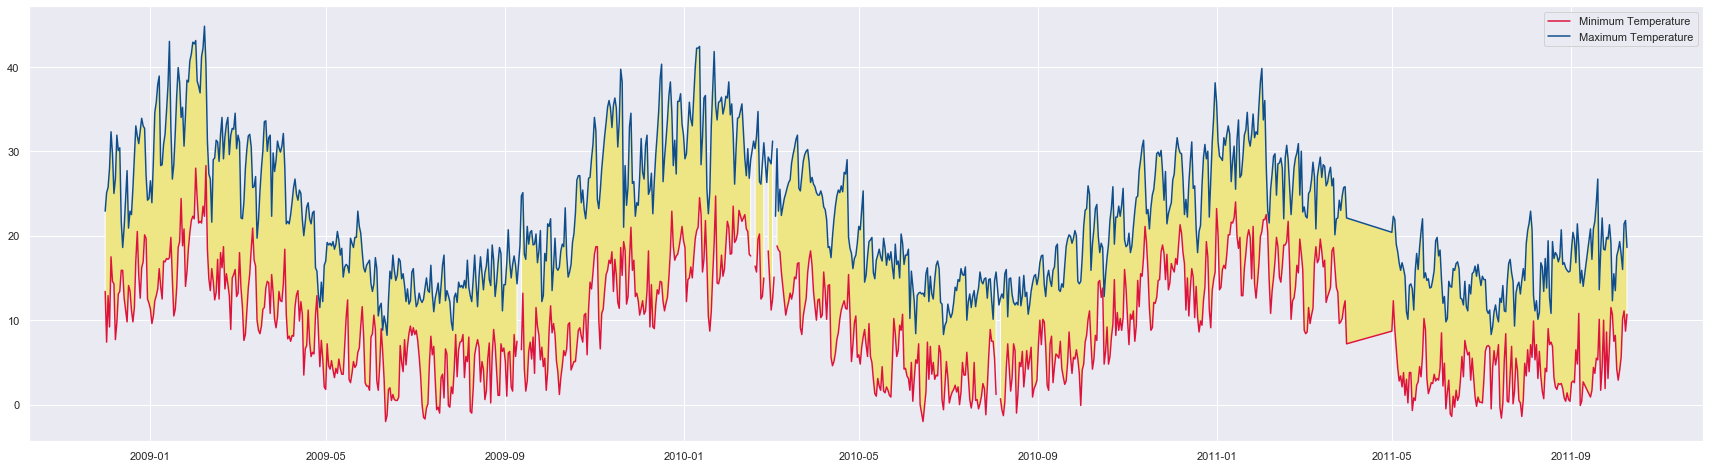

In [12]:
plt.figure(figsize = (30,8))
plt.plot(df_aus2['Date'][:1000], df_aus2['MinTemp'][:1000], color = "#DC143C", label = 'Minimum Temperature',)
plt.plot(df_aus2['Date'][:1000], df_aus2['MaxTemp'][:1000], color = "#104E8B", label = 'Maximum Temperature')
plt.fill_between(df_aus2['Date'][:1000], df_aus2['MinTemp'][:1000], df_aus2['MaxTemp'][:1000], facecolor = "#EEE685")
plt.legend()
plt.show()

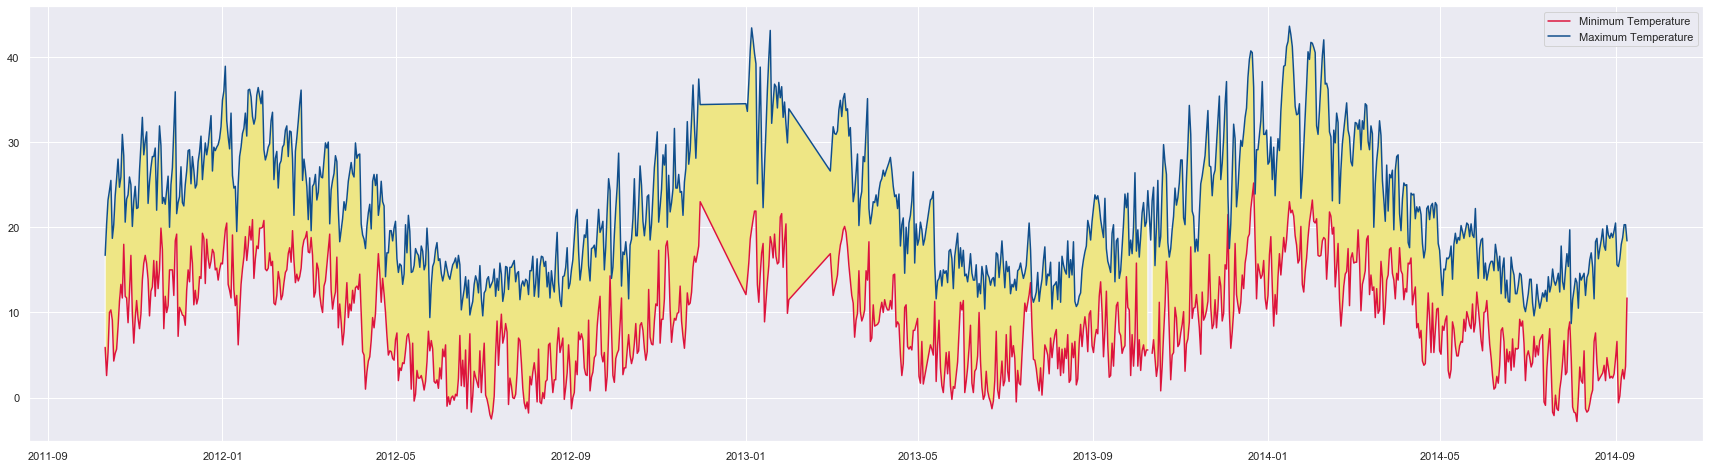

In [13]:
plt.figure(figsize = (30,8))
plt.plot(df_aus2['Date'][1000:2000], df_aus2['MinTemp'][1000:2000], color = "#DC143C", label = 'Minimum Temperature',)
plt.plot(df_aus2['Date'][1000:2000], df_aus2['MaxTemp'][1000:2000], color = "#104E8B", label = 'Maximum Temperature')
plt.fill_between(df_aus2['Date'][1000:2000], df_aus2['MinTemp'][1000:2000], df_aus2['MaxTemp'][1000:2000], facecolor = "#EEE685")
plt.legend()
plt.show()

### Lets Explore all Categorical columns

In [14]:
categorical2

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Lets see about Locations

In [15]:
df_aus2['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


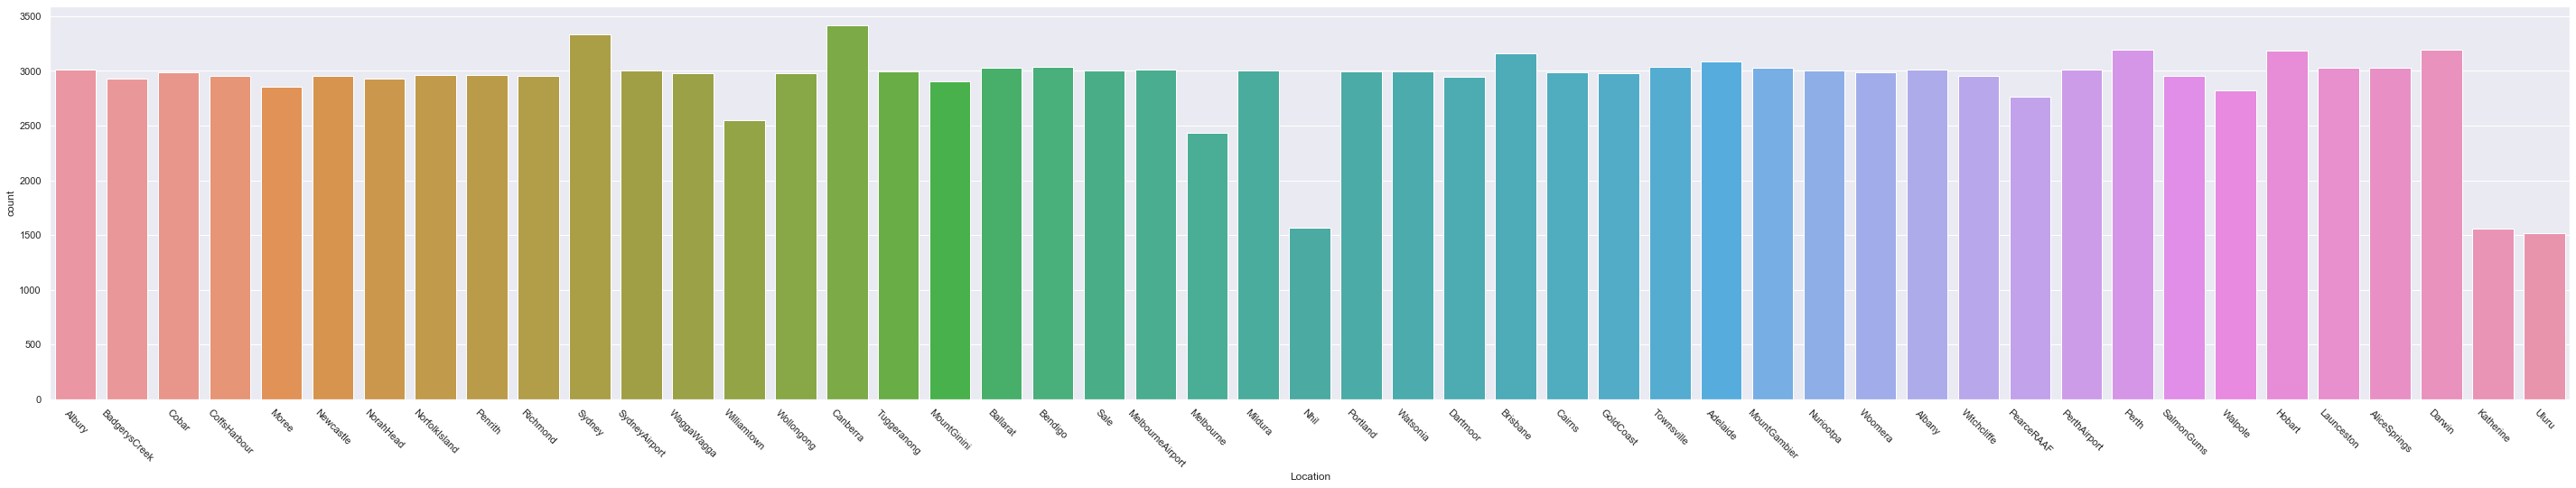

In [16]:
plt.figure(figsize=(50, 8))
sns.countplot(df_aus2['Location'])
plt.xticks(rotation=-45)
plt.show()

Lets see about WindGustDir

In [17]:
df_aus2['WindGustDir'].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

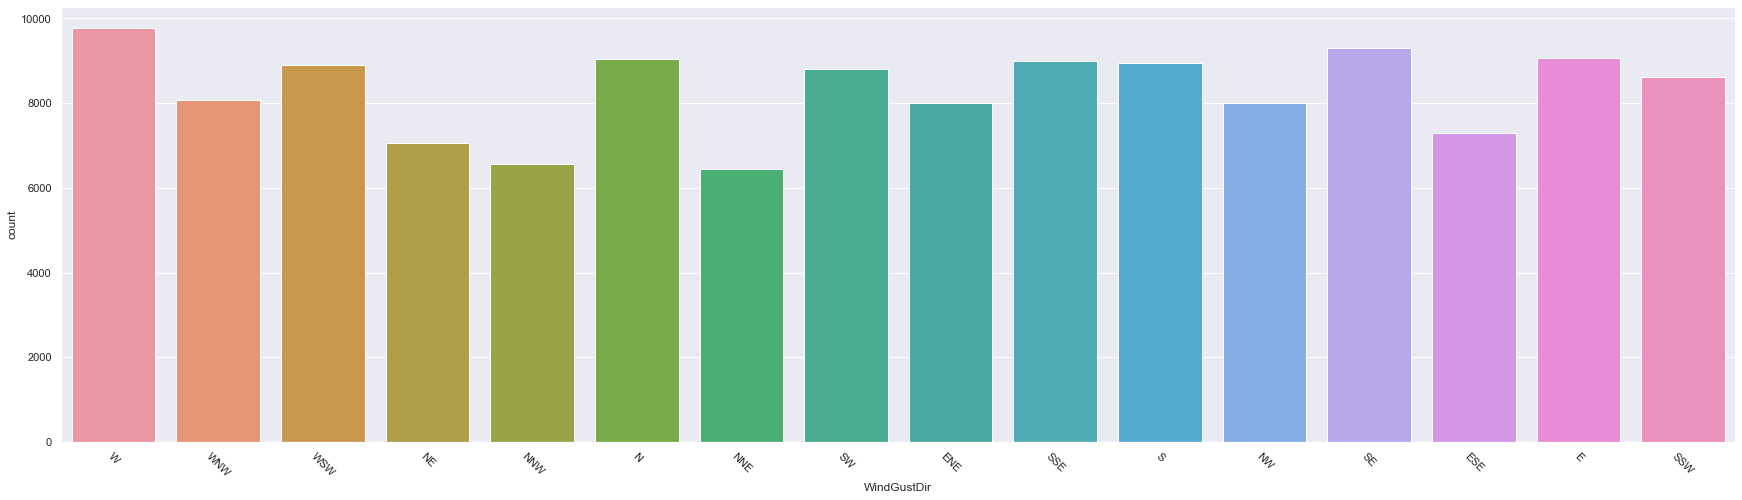

In [18]:
plt.figure(figsize=(30, 8))
sns.countplot(df_aus2['WindGustDir'])
plt.xticks(rotation=-45)
plt.show()

Lets see aout 'WindDir9am'

In [19]:
df_aus2['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

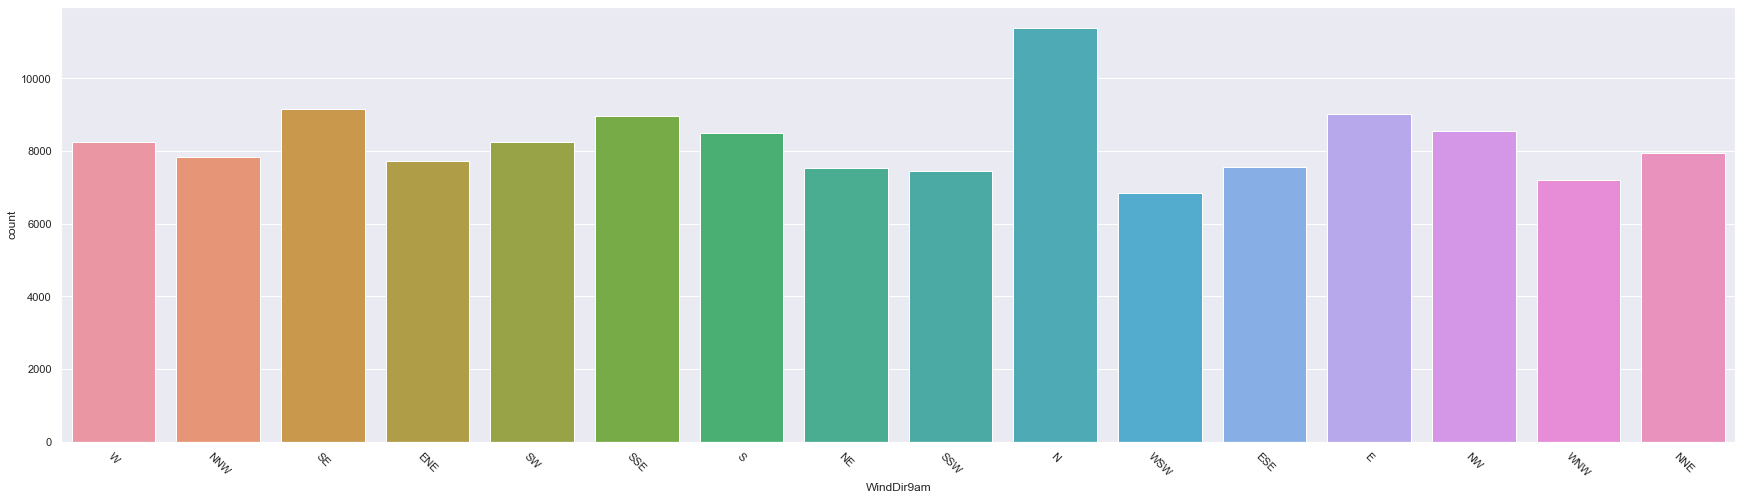

In [20]:
plt.figure(figsize=(30, 8))
sns.countplot(df_aus2['WindDir9am'])
plt.xticks(rotation=-45)
plt.show()

We got the info that in N, wind direction at 9am is high

In [21]:
df_aus2['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

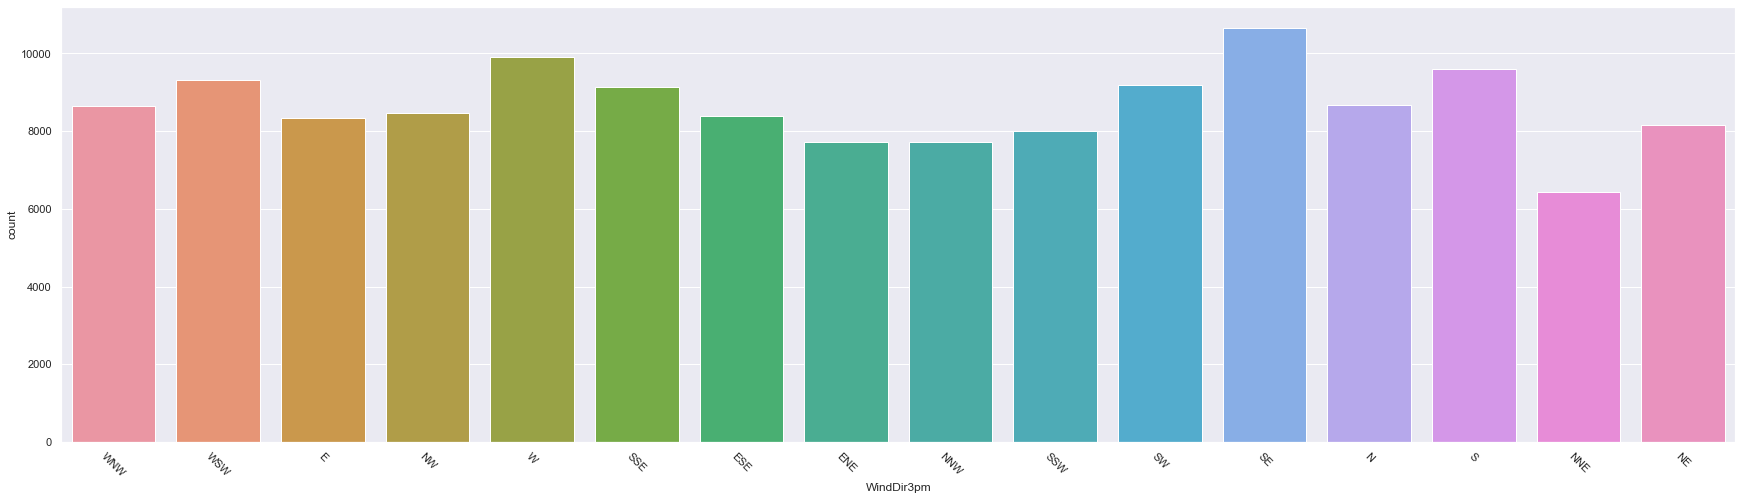

In [22]:
plt.figure(figsize=(30, 8))
sns.countplot(df_aus2['WindDir3pm'])
plt.xticks(rotation=-45)
plt.show()

We see that at 3pm, most of the time the wind direction is in South East (SE)

### Lets Explore all the numerical values

In [23]:
numerical2

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [24]:
numerical3 = numerical2[:]

In [25]:
numerical3 = numerical3[1:]

In [26]:
numerical3

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [27]:
numerical_hist = df_aus2[numerical3]

In [28]:
numerical_hist

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


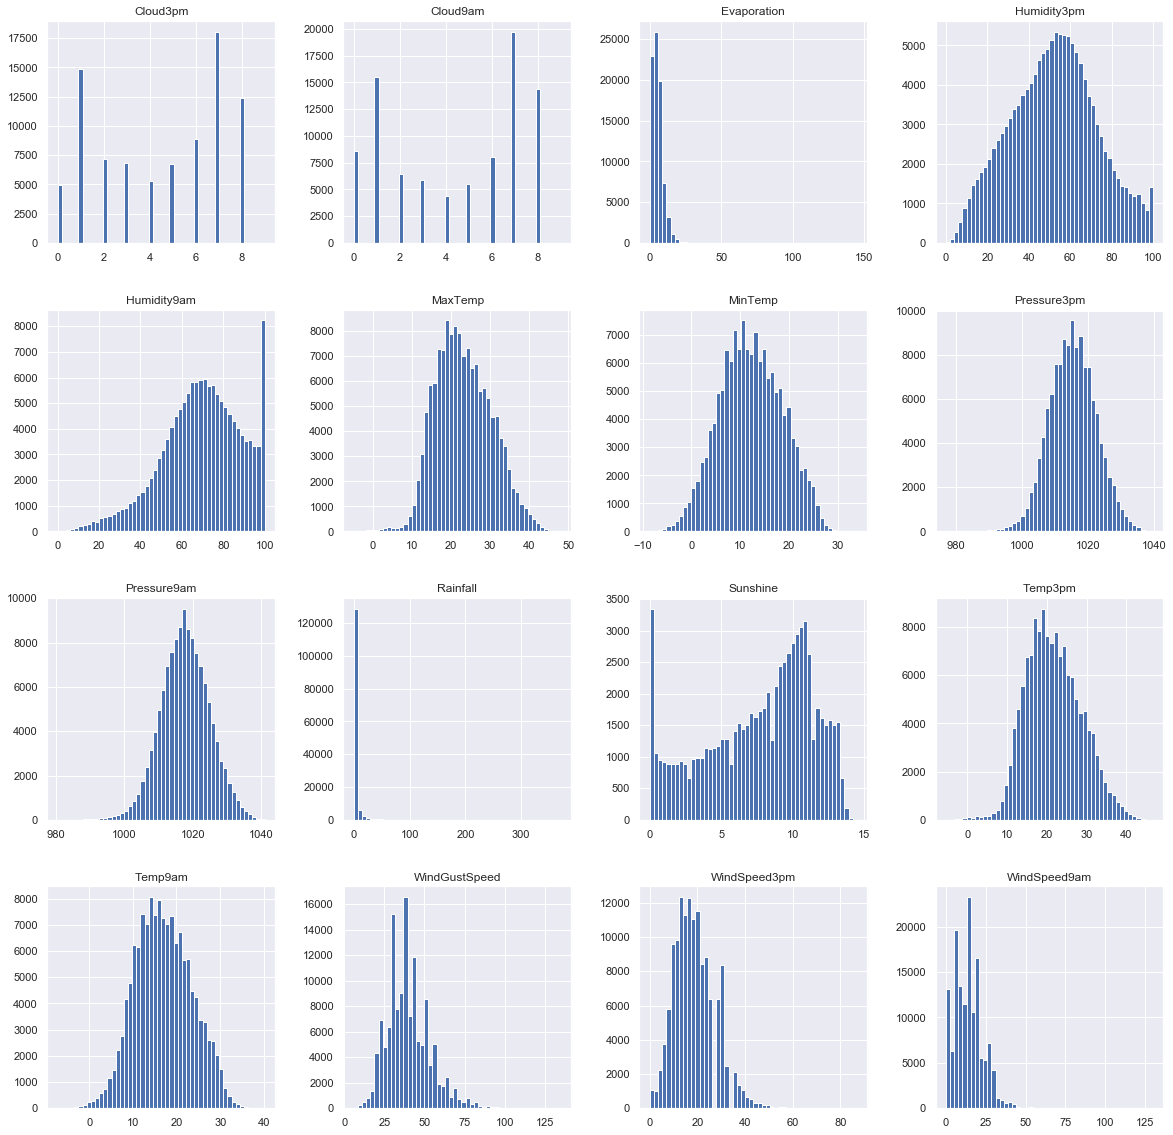

In [29]:
numerical_hist.hist(figsize = [20,20], bins = 50)
plt.show()

# Answers to the questions

#### The most min temp

In [30]:
min(df_aus2['MinTemp'].value_counts().index)

-8.5

#### The most max temp

In [31]:
max(df_aus2['MaxTemp'].value_counts().index)

48.1

#### Largest amount of rainfall

In [32]:
max(df_aus2['Rainfall'].value_counts().index)

371.0

# Model Making

For making the model, we do need to convert categorical values into integer/float values so as to work with them

We do have a list of columns which are categorical, we are gonna make a function, through which we will pass the each column, make dummy, add the dummy[:-1] to the dataset and when the whole process is done, we will return a new dataset

In [33]:
def making_new_df(data, columnlist):
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [34]:
df_aus3 = making_new_df(df_aus2, categorical2)

In [35]:
df_aus3

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,NW,S,SE,SSE,SSW,SW,W,WNW,No,No
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,0,0,0,0,0,0,0,1,1,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,0,0,0,0,0,0,0,0,1,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,0,0,0,0,0,0,0,0,1,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,0,0,0,0,0,0,0,0,1,1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,0,0,0,0,0,0,0,0,1,1
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,0,0,0,0,0,0,0,0,1,1
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,0,0,0,0,0,0,0,0,1,1
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,0,0,0,0,0,0,0,1,1,1


Now we will remove those columns which we won't be needing for model making... and those are Date and all the categorical variables, since these has already been converted to one-hot encoded form

In [36]:
df_aus3 = df_aus3.drop(['Date']+categorical, axis = 1)

In [37]:
df_aus3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,No,No
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,1,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,1
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,1,1


#### Here by using dummy, No = 1 and Yes = 0 has been made. Point to remeber

#### The models I will be making for this will be:
#### Logistic Regression model
#### Random Forest Classififer
#### Naive Bayes

In [38]:
df_aus3.isnull().sum()

MinTemp          637
MaxTemp          322
Rainfall        1406
Evaporation    60843
Sunshine       67816
               ...  
SW                 0
W                  0
WNW                0
No                 0
No                 0
Length: 111, dtype: int64

## Lets split our model into training and testing set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_aus3.iloc[:, :-1]

In [41]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,No
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,1
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,1
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,1
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,1


In [42]:
Y = df_aus3.iloc[:, -1]

In [43]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
142188    1
142189    1
142190    1
142191    1
142192    1
Name: No, Length: 142193, dtype: uint8

In [44]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=42)

We know that we have many nan values in X which will transfer in train_x and test_x, so we will use Imputer so as to fill those Nan values with mean

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [46]:
imputer.fit(train_x)
imputer.fit(test_x)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [47]:
train_x = imputer.transform(train_x)
test_x = imputer.transform(test_x)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
LR = LogisticRegression(max_iter=5000)

In [50]:
model_lr = LR.fit(train_x, train_y)

In [51]:
y_lr_predict = model_lr.predict(test_x)

In [52]:
LR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_lr_predict})

In [53]:
LR_df

,Actual,Predicted
56320,0,0
124136,1,1
117063,1,1
6974,1,1
61546,0,1
...,...,...
58018,0,0
70923,1,1
35190,1,1
58118,1,1


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
score = accuracy_score(test_y, y_lr_predict)

In [57]:
score

0.8449664193537044

In [58]:
model_lr.score(test_x, test_y)

0.8449664193537044

### Random Forest Classififer

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier()

In [61]:
model_rfr = rfc.fit(train_x, train_y)

In [62]:
y_rfr_predict = model_rfr.predict(test_x)

In [63]:
RFR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_rfr_predict})

In [64]:
RFR_df

,Actual,Predicted
56320,0,0
124136,1,1
117063,1,1
6974,1,1
61546,0,1
...,...,...
58018,0,0
70923,1,1
35190,1,1
58118,1,1


In [65]:
model_rfr.score(test_x, test_y)

0.8540033053201589

### Let's go for Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
gnb = GaussianNB()

In [68]:
model_gnb = gnb.fit(train_x, train_y)

In [69]:
y_gnb_predict = model_gnb.predict(test_x)

In [70]:
GNB_df = pd.DataFrame(data = {"Actual":test_y, "Predicted": y_gnb_predict})

In [71]:
GNB_df

,Actual,Predicted
56320,0,0
124136,1,1
117063,1,1
6974,1,1
61546,0,0
...,...,...
58018,0,1
70923,1,1
35190,1,1
58118,1,1


In [72]:
model_gnb.score(test_x, test_y)

0.65877843806041